In [1]:
import pandas as pd
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models 
from keras import layers 
import matplotlib.pyplot as plt
%matplotlib inline
import os
from collections import Counter

## Data

In [2]:
train_data_dir = 'chest_xray/train'
val_data_dir = 'chest_xray/val'
test_data_dir = 'chest_xray/test'

In [3]:
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir, target_size=(64,64), batch_size=5216)
test_generator = ImageDataGenerator().flow_from_directory(test_data_dir, target_size=(64,64), batch_size=624)
val_generator = ImageDataGenerator().flow_from_directory(val_data_dir, target_size=(64,64), batch_size=16)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
# check for class imbalance 
train_counter = Counter(train_generator.classes)
print('train:', train_counter)
test_counter = Counter(test_generator.classes)
print('test:', test_counter)

train: Counter({1: 3875, 0: 1341})
test: Counter({1: 390, 0: 234})


In [7]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

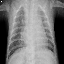

In [8]:
array_to_img(train_images[1])

In [9]:
train_labels[1]

array([0., 1.], dtype=float32)

## Preprocessing

In [10]:
print('train:', train_images.shape, train_labels.shape)
print('test:', test_images.shape, test_labels.shape)
print('val:', val_images.shape, val_labels.shape)

train: (5216, 64, 64, 3) (5216, 2)
test: (624, 64, 64, 3) (624, 2)
val: (16, 64, 64, 3) (16, 2)


In [11]:
#preprocessing images
train_unrow = train_images.reshape(5216,-1)

In [12]:
train_unrow.shape

(5216, 12288)

In [13]:
test_unrow = test_images.reshape(624, -1)
test_unrow.shape

(624, 12288)

In [14]:
val_unrow = val_images.reshape(16, -1)
val_unrow.shape

(16, 12288)

In [15]:
#preprocessing labels
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [16]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [17]:
train_label_final = np.reshape(train_labels[:,1], (5216,1))

In [18]:
np.shape(train_label_final)

(5216, 1)

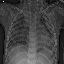

In [19]:
array_to_img(train_images[0])

In [20]:
# value 0 = normal, value 1 = pneumonia 
train_label_final[0]

array([1.], dtype=float32)

In [21]:
test_label_final = np.reshape(test_labels[:,1], (624,1))
np.shape(test_label_final)

(624, 1)

In [22]:
val_label_final = np.reshape(val_labels[:,1], (16,1))
np.shape(val_label_final)

(16, 1)

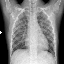

In [23]:
array_to_img(train_images[46])

In [25]:
train_label_final[46]

array([0.], dtype=float32)

### Data Normalization

In [26]:
#normalizing data
train_image_final = train_unrow/255
test_image_final = test_unrow/255
val_image_final = val_unrow/255

In [27]:
train_image_final.shape

(5216, 12288)

## Baseline model

In [28]:
np.random.seed(123)
base_model = models.Sequential()
base_model.add(layers.Dense(2000, activation='relu', input_shape=(12288,)))
base_model.add(layers.Dense(100, activation='relu'))
base_model.add(layers.Dense(1, activation='softmax'))

In [29]:
base_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [30]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2000)              24578000  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               200100    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 24,778,201
Trainable params: 24,778,201
Non-trainable params: 0
_________________________________________________________________


In [31]:
base_results = base_model.fit(train_image_final, train_label_final, epochs=100, 
                              batch_size=64, validation_data=(val_image_final, val_label_final))

Epoch 1/100
82/82 [==============================] - 11s 134ms/step - loss: nan - acc: 0.3779 - val_loss: nan - val_acc: 0.5000
Epoch 2/100
82/82 [==============================] - 13s 162ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 3/100
82/82 [==============================] - 18s 216ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 4/100
82/82 [==============================] - 19s 235ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 5/100
82/82 [==============================] - 18s 224ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 6/100
82/82 [==============================] - 13s 154ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 7/100
82/82 [==============================] - 12s 145ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 8/100
82/82 [==============================] - 11s 133ms/step - loss: nan - acc: 0.2571 - val_loss

82/82 [==============================] - 13s 153ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 65/100
82/82 [==============================] - 12s 142ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 66/100
82/82 [==============================] - 14s 175ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 67/100
82/82 [==============================] - 13s 157ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 68/100
82/82 [==============================] - 14s 173ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 69/100
82/82 [==============================] - 11s 137ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 70/100
82/82 [==============================] - 12s 140ms/step - loss: nan - acc: 0.2571 - val_loss: nan - val_acc: 0.5000
Epoch 71/100
82/82 [==============================] - 12s 150ms/step - loss: nan - acc: 0.2571 - val_loss: nan

In [32]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

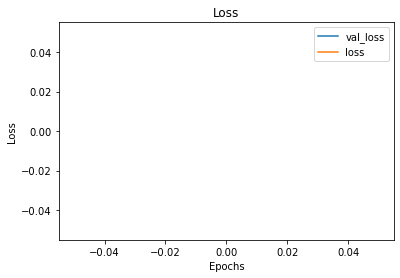

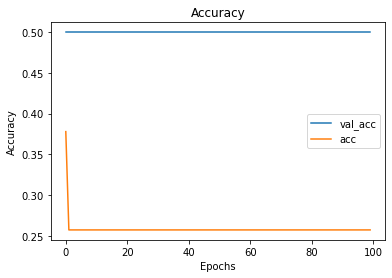

In [33]:
visualize_training_results(base_results)

**analysis:** need to raise # of epochs, maybe change activation ftn and potentially add another layer in next iteration - shows underfitting

## CNN #1

In [224]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)              

In [225]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [226]:
results_1 = model.fit(train_images,
                    train_label_final,
                    epochs=100,
                    validation_data=(val_images, val_label_final))

Epoch 1/100
163/163 [==============================] - 42s 258ms/step - loss: 3.4283 - acc: 0.8875 - val_loss: 1.1044 - val_acc: 0.6250
Epoch 2/100
163/163 [==============================] - 35s 214ms/step - loss: 0.1410 - acc: 0.9482 - val_loss: 0.2006 - val_acc: 1.0000
Epoch 3/100
163/163 [==============================] - 34s 210ms/step - loss: 0.1085 - acc: 0.9599 - val_loss: 0.1795 - val_acc: 1.0000
Epoch 4/100
163/163 [==============================] - 37s 227ms/step - loss: 0.0939 - acc: 0.9647 - val_loss: 0.3648 - val_acc: 0.7500
Epoch 5/100
163/163 [==============================] - 40s 246ms/step - loss: 0.0887 - acc: 0.9674 - val_loss: 0.1992 - val_acc: 0.8750
Epoch 6/100
163/163 [==============================] - 39s 236ms/step - loss: 0.0815 - acc: 0.9688 - val_loss: 0.2995 - val_acc: 0.8125
Epoch 7/100
163/163 [==============================] - 42s 260ms/step - loss: 0.0696 - acc: 0.9728 - val_loss: 0.4526 - val_acc: 0.7500
Epoch 8/100
163/163 [===========================

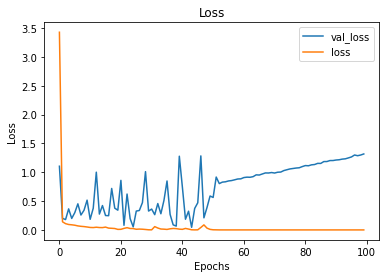

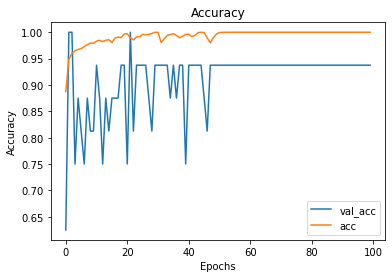

In [227]:
visualize_training_results(results_1)

In [229]:
results_1_train = model.evaluate(train_images, train_label_final)
results_1_train

163/163 [==============================] - 6s 38ms/step - loss: 4.2461e-07 - acc: 1.0000: 1s - los


[4.246057869750075e-07, 1.0]

In [230]:
results_1_test = model.evaluate(test_images, test_label_final)
results_1_test

20/20 [==============================] - 1s 32ms/step - loss: 6.4779 - acc: 0.7468


[6.477949619293213, 0.7467948794364929]

**analysis:** model overall performance increased but shows signs of overfitting - need to resolve this is next iteration

## CNN #2

In [47]:
#try VGG blocks 
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', 
                         input_shape=(64, 64, 3)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)            

In [48]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [49]:
results2 = model2.fit(train_images, train_label_final,
                     epochs=100,
                     validation_data=(val_images, val_label_final))

Epoch 1/100
163/163 [==============================] - 63s 388ms/step - loss: 1.4288 - acc: 0.8961 - val_loss: 0.1686 - val_acc: 0.9375
Epoch 2/100
163/163 [==============================] - 63s 386ms/step - loss: 0.1174 - acc: 0.9544 - val_loss: 0.3159 - val_acc: 0.8750
Epoch 3/100
163/163 [==============================] - 56s 342ms/step - loss: 0.0888 - acc: 0.9682 - val_loss: 0.0921 - val_acc: 1.0000
Epoch 4/100
163/163 [==============================] - 54s 330ms/step - loss: 0.0957 - acc: 0.9647 - val_loss: 0.2823 - val_acc: 0.9375
Epoch 5/100
163/163 [==============================] - 53s 323ms/step - loss: 0.0618 - acc: 0.9785 - val_loss: 0.4870 - val_acc: 0.8125
Epoch 6/100
163/163 [==============================] - 55s 336ms/step - loss: 0.0657 - acc: 0.9745 - val_loss: 0.2943 - val_acc: 0.9375
Epoch 7/100
163/163 [==============================] - 55s 335ms/step - loss: 0.0489 - acc: 0.9826 - val_loss: 0.4107 - val_acc: 0.8750
Epoch 8/100
163/163 [===========================

Epoch 60/100
163/163 [==============================] - 52s 320ms/step - loss: 4.3059e-07 - acc: 1.0000 - val_loss: 0.5912 - val_acc: 0.9375
Epoch 61/100
163/163 [==============================] - 54s 333ms/step - loss: 3.8732e-07 - acc: 1.0000 - val_loss: 0.6105 - val_acc: 0.9375
Epoch 62/100
163/163 [==============================] - 56s 344ms/step - loss: 3.4071e-07 - acc: 1.0000 - val_loss: 0.6086 - val_acc: 0.9375
Epoch 63/100
163/163 [==============================] - 52s 322ms/step - loss: 3.0445e-07 - acc: 1.0000 - val_loss: 0.6163 - val_acc: 0.9375
Epoch 64/100
163/163 [==============================] - 61s 373ms/step - loss: 2.7362e-07 - acc: 1.0000 - val_loss: 0.6201 - val_acc: 0.9375
Epoch 65/100
163/163 [==============================] - 67s 413ms/step - loss: 2.5102e-07 - acc: 1.0000 - val_loss: 0.6162 - val_acc: 0.9375
Epoch 66/100
163/163 [==============================] - 63s 384ms/step - loss: 2.2353e-07 - acc: 1.0000 - val_loss: 0.6126 - val_acc: 0.9375
Epoch 67/100


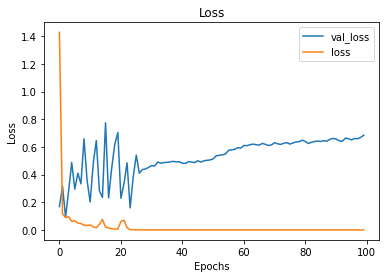

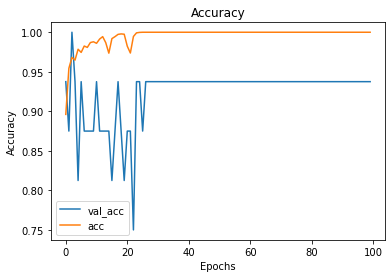

In [50]:
visualize_training_results(results2)

In [51]:
results2_train = model2.evaluate(train_images, train_label_final)
results2_train

163/163 [==============================] - 13s 78ms/step - loss: 1.3280e-08 - acc: 1.0000


[1.3280446964358816e-08, 1.0]

In [53]:
results2_test = model2.evaluate(test_images, test_label_final)
results2_test

20/20 [==============================] - 1s 70ms/step - loss: 6.6331 - acc: 0.7692


[6.633061408996582, 0.7692307829856873]

In [ ]:
#choose best architecture then fix for overfitting with dropout => cnn#2 had higher testing accuracy 
# add increasing dropout layers to help with overfitting, batch normalization, and early stopping callback 

In [56]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', 
                         input_shape=(64, 64, 3)))
model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.2))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.3))

model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.4))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 64)       

In [57]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [60]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = 'val_acc', patience=10)

results3 = model3.fit(train_images, train_label_final,
                     epochs=100, callbacks=callback,
                     validation_data=(val_images, val_label_final))

Epoch 1/100
163/163 [==============================] - 71s 438ms/step - loss: 0.0457 - acc: 0.9839 - val_loss: 1.3020 - val_acc: 0.5625
Epoch 2/100
163/163 [==============================] - 71s 434ms/step - loss: 0.0418 - acc: 0.9854 - val_loss: 0.4975 - val_acc: 0.7500
Epoch 3/100
163/163 [==============================] - 71s 435ms/step - loss: 0.0390 - acc: 0.9870 - val_loss: 1.7676 - val_acc: 0.5625
Epoch 4/100
163/163 [==============================] - 71s 434ms/step - loss: 0.0440 - acc: 0.9849 - val_loss: 1.7601 - val_acc: 0.6250
Epoch 5/100
163/163 [==============================] - 71s 437ms/step - loss: 0.0370 - acc: 0.9870 - val_loss: 0.4010 - val_acc: 0.8125
Epoch 6/100
163/163 [==============================] - 71s 433ms/step - loss: 0.0319 - acc: 0.9885 - val_loss: 1.5422 - val_acc: 0.8125
Epoch 7/100
163/163 [==============================] - 71s 433ms/step - loss: 0.0295 - acc: 0.9896 - val_loss: 0.1484 - val_acc: 0.8750
Epoch 8/100
163/163 [===========================

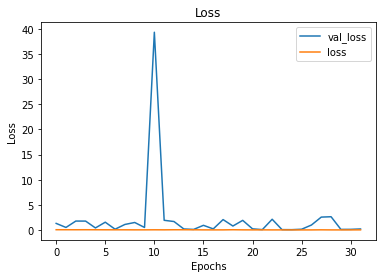

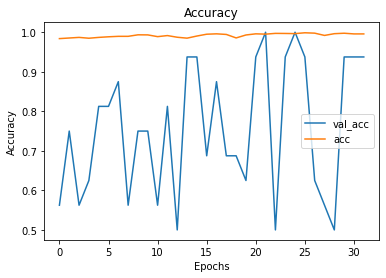

In [61]:
visualize_training_results(results3)

In [62]:
results3_train = model3.evaluate(train_images, train_label_final)
results3_train

163/163 [==============================] - 20s 121ms/step - loss: 0.0010 - acc: 0.9998


[0.001023292075842619, 0.9998083114624023]

In [63]:
results3_test = model3.evaluate(test_images, test_label_final)
results3_test

20/20 [==============================] - 2s 92ms/step - loss: 1.5788 - acc: 0.7788


[1.5787585973739624, 0.7788461446762085]

In [64]:
#accuracy inceased 1% but learning is still happening too fast - 
#need to slow it down - try tweaking learning rate parameter to demonstrate log decay

In [223]:
#CNN

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1